In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = { "160": ["160",
450386.265 / 738920.093 * 100 ,
450600.461 / 735594.535 * 100 ,
450433.469 / 736353.245 * 100 ,
],
"240": ["240",
450035.605 / 1100303.233 * 100 ,
449921.486 / 1105513.42 * 100 ,
450035.664 / 1100188.602 * 100 ,
],
"320": ["320",
450110.088 / 1470773.837 * 100 ,
450108.931 / 1483341.787 * 100 ,
450261.954 / 1467181.085 * 100 ,
], }
df = pd.DataFrame.from_dict(data, orient='index', columns=['ratio','1st empirical (%)','2nd empirical (%)','3rd empirical (%)'])

In [3]:
means=df.mean(axis=1)
errors=df.std(axis=1)

In [4]:
ttx_data = { "160": ["160",
450386.265 ,
450600.461 ,
450433.469 ,
],
"240": ["240",
450035.605  ,
449921.486  ,
450035.664 ,
],
"320": ["320",
450110.088  ,
450108.931  ,
450261.954  ,
], }
ttx_df = pd.DataFrame.from_dict(ttx_data, orient='index', columns=['ratio','1st empirical (%)','2nd empirical (%)','3rd empirical (%)'])
means_ttx=ttx_df.mean(axis=1)
means_ttx /= 300

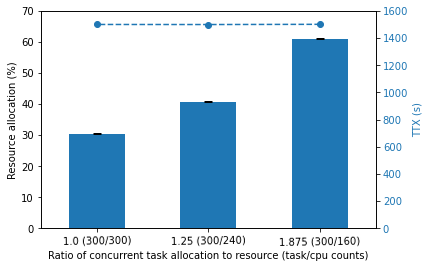

In [5]:
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax, capsize=4, rot=1)
ax1 = ax.twinx()
ax1_color = 'tab:blue'
means_ttx.plot(ax=ax1, style='--', color=ax1_color, marker='o')
ax.set_ylim(0,70)
ax1.set_ylim(0, 1600)
ax1.set_ylabel('TTX (s)', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax.set_xlabel("Ratio of concurrent task allocation to resource (task/cpu counts)")
ax.set_ylabel("Resource allocation (%)")
labels = ["1.875 (300/160)", "1.25 (300/240)" , "1.0 (300/300)"]
ax.set_xticklabels(labels)
ax.invert_xaxis()

In [6]:
df['means'] = means
df['errors'] = errors
df

,ratio,1st empirical (%),2nd empirical (%),3rd empirical (%),means,errors
160,160,60.951958,61.256635,61.170840,61.126478,0.157108
240,240,40.901053,40.697967,40.905320,40.834780,0.118503
320,320,30.603624,30.344249,30.688915,30.545596,0.179510
